## Mission 1. Netfilx and Code
----
호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

### Mandatory Part
[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows) 가 주어졌을 때, 다음 질문에 답하시오:

- __한국 작품__은 총 얼마나 있는가?  
  - `country` column을 기준으로 한다.
  - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)


In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

netflix = pd.read_csv('./netflix_titles.csv')

netflix_korea = netflix[netflix['country']=='South Korea']

netflix_korea_cnt = netflix_korea['country'].count()

print("한국작품의 수:", netflix_korea_cnt)

한국작품의 수: 183


----
생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.  
### Bonus Part

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows) 가 주어졌을 때, 다음 질문에 답하시오:

----
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  - `country` column을 기준으로 한다.
  - **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [65]:
netflix_group = netflix.groupby('country')

nm = netflix_group.count()

mx = nm['title'].max()

mx_country = nm[nm['title']==mx]

t = mx_country.index[0]

print("최다 타이틀 국가:{}({}개)".format(t, mx))

최다 타이틀 국가:United States(2555개)



## Mission 2. 가즈아!
----
서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Mandatory Part  
----
[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

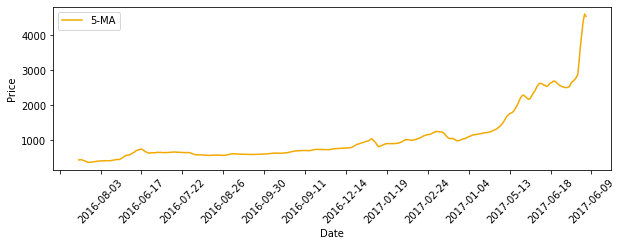

In [175]:
bitcoin = pd.read_csv('./BitCoin.csv')

bitcoin_itv = bitcoin[bitcoin['Date']<'2017-07-01']
bitcoin_itv = bitcoin_itv[bitcoin_itv['Date']>'2016-05-31']


x = bitcoin_itv['Date']
y = bitcoin_itv['Open']
df = y.rolling(5).mean()

plt.figure(figsize=(10,3))
plt.plot(x, df, color='#f2a900', label='5-MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
ax = plt.gca()
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.invert_xaxis()
plt.legend()

plt.show()


----
해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

### Bonus Part
위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 **5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

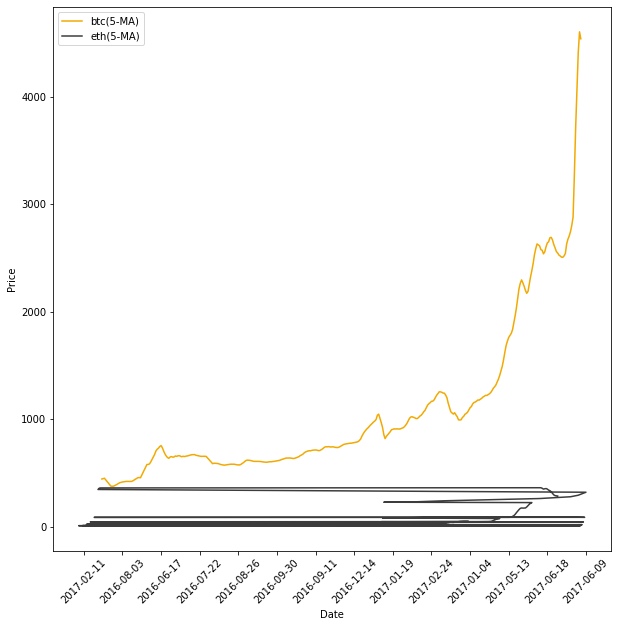

In [182]:
bitcoin = pd.read_csv('./BitCoin.csv')
eth = pd.read_csv('./ETH_day.csv')

bitcoin_itv = bitcoin[bitcoin['Date']<'2017-07-01']
bitcoin_itv = bitcoin_itv[bitcoin_itv['Date']>'2016-05-31']

eth_itv = eth[eth['Date']<'2017-07-01']
eth_itv = eth_itv[eth_itv['Date']>'2016-05-31']

x = bitcoin_itv['Date']
y = bitcoin_itv['Open']
df = y.rolling(5).mean()

ex = eth_itv['Date']
ey = eth_itv['Open']
edf = ey.rolling(5).mean()


dx = pd.date_range('2017-05-31', '2016-06-01')

plt.figure(figsize=(10,10))
plt.plot(x, df, color='#f2a900', label='btc(5-MA)')
plt.plot(ex, edf, color='#3c3c3d', label='eth(5-MA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
ax = plt.gca()
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.invert_xaxis()
#plt.axis([min(x),max(x),min(y),max(y)])
#plt.xticks(dx)
plt.legend()

plt.show()

#cx[0]
#x.head(5)

이유는 모르겠지만 eth는 값이 이상하게 튄다.